In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# A = counts(data == A)
# B = counts(data == B)
# # Class prior for A
# pi_A     = A / (A + B)
# # P(X|A):
# p_X_a    = 0.7 <-- based on empirical knowledge.
# muA      = mean(A)
# sigmaA   = stdev(A)
# p_X_a    = pdf(data==A, muA, sigmaA)
# # P(A)
# P_A      = (pi_A * p_X_a) / (pi_B * p_X_b)

# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
	# calculate P(not A)
	not_a = 1 - p_a
	# calculate P(B)
	p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
	# calculate P(A|B)
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b

# P(A)
p_a = 0.0002
# P(B|A)
p_b_given_a = 0.85
# P(B|not A)
p_b_given_not_a = 0.05
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%


In [25]:
# Mean Squared Error.
def MSE(y_data, y_pred):
    """
    Args:
        y_data (array): Input measurements or raw data.
        y_pred (array): Trained values.

    Returns:
        mse: Float, like a score that is useful for evaluating trained values
    """
    # Check if the length of two arrays are the same.
    assert len(y_data) is len(y_pred), "The length of two arrays must be the same."
    # Error recording.
    err = []
    for y1, y2 in zip(y_data, y_pred):
        # Squared error.
        err.append((y1-y2)**2)
    
    # Make average.
    mse = sum(err)/len(err)
    
    return mse

In [26]:
# Test for function "MSE".
# Artifical data.
y_data = [1,4,2,3,6,1,3]
y_pred = [2,3,4,6,3,5,2]
# Result.
MSE(y_data, y_pred)

5.857142857142857

In [27]:
# Gradient descent
def GD(x_data, y_data, alpha, beta_init, steps):
    """
    Args:
        x_data (array): Statistical weights for individual data.
        y_data (array): Input measurements or raw data.
        y_pred (array): Trained values.
        alpha (float, 0~1): Learning rate.
        beta_init (float): Initial value. (learning curve)
        
    Returns:
        beta: Float, learning outputs.
    """
    
    records = [beta_init]
    beta = beta_init
    for step in range(steps):
        dB = []
        for xd, yp, yd in zip(x_data, y_pred, y_data):
            dB.append(xd*(yp-yd))
        dB_grad = sum(dB)/len(dB)
        beta = beta - alpha*dB_grad
        records.append(beta)
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax.plot(records)
    
    return beta

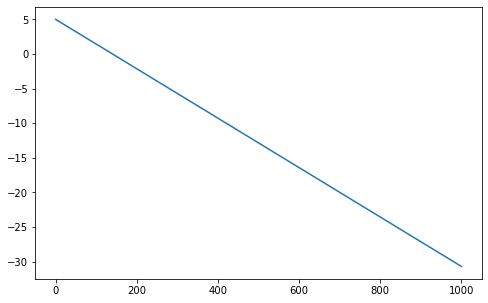

In [28]:
# Set the learning rate to be a small number
alpha    = 0.05
# Initial value for beta.
beta_init = 5
# Steps for finding minimum beta.
steps = 1000
# Artifical data.
x_data = [1,1,1,1,1,1,1]
y_data = [1,4,2,3,6,1,3]
y_pred = [2,3,4,6,3,5,2]
# Update beta based on dB
beta = GD(x_data, y_data, alpha, beta_init, steps)

In [8]:
# trainTestSplit
# Assume X and Y have same number of samples in the row space
# X        = predictors
# Y        = response
def trainTestSplit(X, Y, subset_size=0.8, seed=20):
    # Pick different seed.
    np.random.seed(seed)
    # Get vector of indicies
    idx = np.arange(X.shape[0])
    # Randomly sample a subset of the indices. I will do 80% of the data.
    np.random.shuffle(idx)
    trainIdx = idx[:int(len(idx)*subset_size)]
    testIdx = idx[int(len(idx)*subset_size):]
    # Using these shuffled indicies, get the dataset.
    Xtrain = X[trainIdx, :]
    Ytrain = Y[trainIdx, :]
    Xtest = X[testIdx, :]
    Ytest = Y[testIdx, :]
    
    return Xtrain, Ytrain, Xtest, Ytest

In [40]:
X = np.random.rand(10,5)
Y = np.random.rand(10,5)
res = trainTestSplit(X, Y, subset_size=0.8)
print('Shape of Xtrain:', res[0].shape)
print('Shape of Ytrain:', res[1].shape)
print('Shape of Xtest:', res[2].shape)
print('Shape of Ytest:', res[3].shape)

Shape of Xtrain: (8, 5)
Shape of Ytrain: (8, 5)
Shape of Xtest: (2, 5)
Shape of Ytest: (2, 5)


In [78]:
X = np.random.rand(100,1)
Y = np.random.rand(100,1)
res = trainTestSplit(X, Y, subset_size=0.8)
print('Shape of Xtrain:', res[0].shape)
print('Shape of Ytrain:', res[1].shape)
print('Shape of Xtest:', res[2].shape)
print('Shape of Ytest:', res[3].shape)
print(X)

Shape of Xtrain: (80, 1)
Shape of Ytrain: (80, 1)
Shape of Xtest: (20, 1)
Shape of Ytest: (20, 1)
[[0.48813829]
 [0.04043658]
 [0.45801559]
 [0.77029612]
 [0.0643029 ]
 [0.58021231]
 [0.41576524]
 [0.39876695]
 [0.86454003]
 [0.29691737]
 [0.95179973]
 [0.37285849]
 [0.36049898]
 [0.09176062]
 [0.72826243]
 [0.7660708 ]
 [0.80916604]
 [0.85936647]
 [0.39617927]
 [0.05818163]
 [0.77708982]
 [0.01569231]
 [0.05612647]
 [0.15490276]
 [0.28574088]
 [0.01812208]
 [0.37157946]
 [0.20129212]
 [0.92061353]
 [0.27321676]
 [0.51164521]
 [0.14087503]
 [0.3846409 ]
 [0.59462182]
 [0.70989809]
 [0.96979468]
 [0.55747551]
 [0.57145969]
 [0.17555896]
 [0.77225002]
 [0.35541874]
 [0.93406095]
 [0.17101624]
 [0.38116616]
 [0.3509808 ]
 [0.67642333]
 [0.04254994]
 [0.97918009]
 [0.14535345]
 [0.48350483]
 [0.77424447]
 [0.72383862]
 [0.73180801]
 [0.30070491]
 [0.24252488]
 [0.63272596]
 [0.51267517]
 [0.75129905]
 [0.19771807]
 [0.88050791]
 [0.62333556]
 [0.7230822 ]
 [0.34791116]
 [0.18256376]
 [0.59

In [76]:
# Linear regression.
class LinearRegression:
    
    def __init__(self, X, Y, subset_size=0.8, alpha=0.05, epochs=500):
        # Initialize data
        self.beta = np.random.rand()
        self.intercept = np.random.rand()
        self.alpha = alpha
        self.epochs = epochs
        self.mse = np.zeros(epochs)
        self._dataset = self.trainTestSplit(X, Y, subset_size)
    
    @property
    def dataset(self):
        return self._dataset
        
    def trainTestSplit(self, X, Y, subset_size):
        # Get vector of indicies
        idx = np.arange(X.shape[0])
        # Randomly sample a subset of the indices. I will do 80% of the data.
        np.random.shuffle(idx)
        trainIdx = idx[:int(len(idx)*subset_size)]
        testIdx = idx[int(len(idx)*subset_size):]
        # Using these shuffled indicies, get the dataset.
        Xtrain = X[trainIdx, :]
        Ytrain = Y[trainIdx, :]
        Xtest = X[testIdx, :]
        Ytest = Y[testIdx, :]
        # Updata dataset in class property.
        return {'Xtrain':Xtrain, 'Ytrain':Ytrain, 'Xtest':Xtest, 'Ytest':Ytest}

    def RegressionLearning(self):
        
        # Linear regression function
        def lm(X, beta, intercept):
            yhat = X * beta + intercept
            return yhat
        
        # Learning with regression
        for i in range(self.epochs):
            ypred= lm(self.dataset['Xtrain'], self.beta, self.intercept)
            dB1 = np.mean([(y1-y2) for y1, y2 in zip(ypred, self.dataset['Ytrain'])])
            dB2 = np.mean([xi*(y1-y2) for y1, y2, xi in zip(ypred, self.dataset['Ytrain'], self.dataset['Xtrain'])])
            self.mse[i] = 0.5*np.sum([(y1-y2)**2 for y1, y2 in zip(ypred, self.dataset['Ytrain'])])
            # Update...
            self.beta = self.beta - self.alpha*dB2
            self.intercept = self.intercept - self.alpha*dB1
        print('self.mse', self.mse)
        plt.plot(self.mse)
        plt.show()

    def Prediction(self):
        # Predict using model
        final_ypred = self.dataset['Xtest'] * self.beta + self.intercept
        # Evaluate model
        r = np.corrcoef(final_ypred, self.dataset['Ytest'])
        plt.plot(final_ypred)
        plt.plot(self.dataset['Ytest'])
        plt.show()
        r2 = r**2
        mse = 0.5*np.sum([(y1-y2)**2 for y1, y2 in zip(final_ypred, self.dataset['Ytest'])])
        return {"r-value":r, "r2-value":r2, "MSE":mse}

self.mse [4.89147365 4.83781709 4.78983588 4.74684319 4.70823587 4.67348421
 4.64212303 4.61374377 4.58798764 4.56453954 4.54312271 4.52349411
 4.50544028 4.48877373 4.4733298  4.45896387 4.4455489  4.43297331
 4.4211391  4.40996018 4.39936093 4.38927492 4.37964377 4.37041622
 4.36154722 4.35299719 4.34473133 4.33671909 4.32893361 4.32135125
 4.31395128 4.30671543 4.29962766 4.29267386 4.2858416  4.27911997
 4.27249936 4.26597128 4.25952831 4.25316386 4.24687216 4.2406481
 4.23448718 4.22838543 4.22233934 4.21634582 4.21040212 4.20450581
 4.19865474 4.192847   4.1870809  4.18135493 4.17566775 4.17001815
 4.16440507 4.15882754 4.15328471 4.14777579 4.1423001  4.13685699
 4.13144589 4.12606629 4.1207177  4.11539969 4.11011185 4.10485383
 4.09962527 4.09442585 4.08925529 4.08411329 4.07899961 4.07391399
 4.06885619 4.063826   4.0588232  4.05384759 4.04889897 4.04397716
 4.03908197 4.03421323 4.02937076 4.0245544  4.01976399 4.01499937
 4.01026037 4.00554686 4.00085867 3.99619567 3.9915577

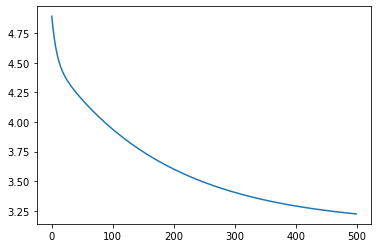

C:\Users\lynch\Anaconda3\envs\ENV\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\lynch\Anaconda3\envs\ENV\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\lynch\Anaconda3\envs\ENV\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


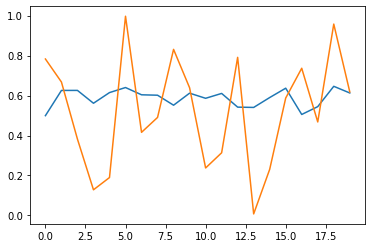

In [77]:
L = LinearRegression(X, Y, subset_size=0.8)
L.RegressionLearning()
res = L.Prediction()

In [66]:
res['r-value']

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])